In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

In [3]:
df_pl=pd.read_csv('final_data.csv')

In [4]:
df_pl

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [8]:
df_pl.duplicated().sum()

0

In [10]:
df_pl.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [12]:
df_pl.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [14]:
df_pl=df_pl.drop(['player'], axis=1)

In [16]:
df_pl.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [18]:
df_pl.sort_values(by='highest_value' , ascending=False).head() 

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2644,Paris Saint-Germain,Kylian Mbappé,Attack Centre-Forward,178.0,24.0,89,0.963082,0.433387,0.204655,0.00000,...,0.0,0.0,7476,139,23,37,180000000,200000000,4,0
2643,Paris Saint-Germain,Lionel Messi,Attack-RightWinger,170.0,35.0,75,0.442464,0.483945,0.013827,0.00000,...,0.0,0.0,6509,167,30,92,45000000,180000000,4,1
2642,Paris Saint-Germain,Neymar,Attack-LeftWinger,175.0,31.0,57,0.594883,0.479744,0.383795,0.01919,...,0.0,0.0,4690,419,67,35,70000000,180000000,4,1
453,Manchester City,Erling Haaland,Attack Centre-Forward,195.0,22.0,83,1.118270,0.234699,0.124252,0.00000,...,0.0,0.0,6519,204,36,17,170000000,170000000,4,0
527,Chelsea FC,Raheem Sterling,Attack-LeftWinger,170.0,28.0,85,0.414233,0.207116,0.111524,0.00000,...,0.0,0.0,5649,284,34,13,60000000,160000000,4,1


In [20]:
df_pl.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [22]:
categorical_features=['team','name','position']
numeric_features=['position',  'height',  'age' , 'appearance' ,'goals',  'assists',  'yellow', 'cards', 'second', 'yellow cards',
 'red cards',  'goals conceded' ,'clean sheet', 'minutes played' ,'days_injured',  'games_injured'  , 'award' ,'current_value',
 'highest_value' , 'position_encoded' ,'winger' ]

In [24]:
df_pl1 = df_pl[(df_pl['highest_value'] <= 100000000) & (df_pl['highest_value'] >= 20000000)]['highest_value']


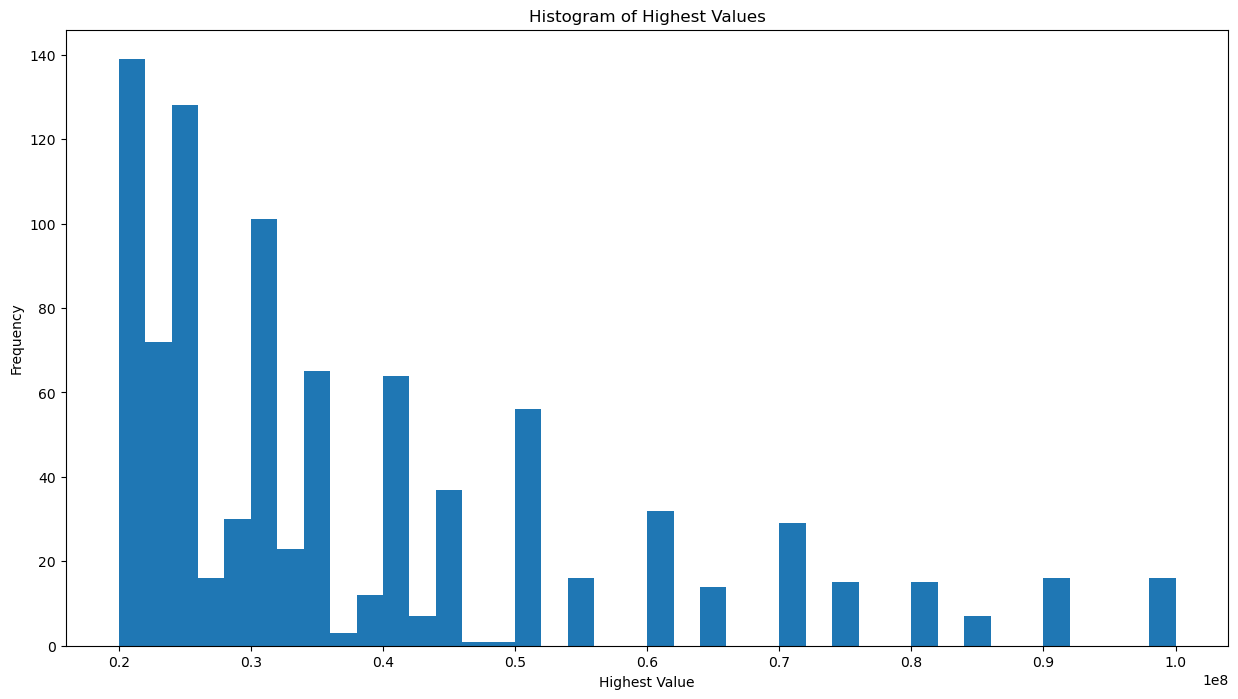

In [26]:
plt.figure(figsize=(15,8))

plt.hist(df_pl1, bins=40)                         
plt.xlabel('Highest Value')
plt.ylabel('Frequency')
plt.title('Histogram of Highest Values')
plt.show()

In [27]:
df_pl=df_pl[(df_pl['highest_value'] <= 100000000) & (df_pl['highest_value'] >= 20000000)]


In [28]:
df_pl

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0000,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0000,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9423,Al-Nassr FC,Luiz Gustavo,midfield-DefensiveMidfield,187.0,35.0,60,0.132576,0.094697,0.189394,0.0000,...,0.000000,0.000000,4752,324,44,7,800000,22000000,3,0
9427,Al-Nassr FC,Talisca,midfield-AttackingMidfield,190.0,29.0,57,0.773639,0.073680,0.202620,0.0000,...,0.000000,0.000000,4886,93,22,11,15000000,28000000,3,0
9428,Al-Nassr FC,Pity Martínez,midfield-AttackingMidfield,170.0,29.0,29,0.451128,0.112782,0.281955,0.0000,...,0.000000,0.000000,1596,553,56,12,7000000,20000000,3,0
10453,Melbourne Victory,Nani,Attack-LeftWinger,177.0,36.0,20,0.000000,0.275510,0.275510,0.0000,...,0.000000,0.000000,980,394,57,17,500000,36500000,4,1


In [32]:
df_pl.sort_values(by='goals' , ascending=False).head() 

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3733,Sociedade Esportiva Palmeiras,Endrick,Attack Centre-Forward,173.0,16.0,8,1.317073,0.000000,0.439024,0.000000,...,0.0,0.0,205,0,0,4,20000000,20000000,4,0
2101,Juventus FC,Mohamed Ihattaren,midfield-AttackingMidfield,183.0,21.0,6,1.304348,0.652174,0.000000,0.000000,...,0.0,0.0,276,0,0,3,0,22000000,3,0
3765,CR Flamengo,Pedro,Attack Centre-Forward,185.0,25.0,10,1.119751,0.000000,0.139969,0.000000,...,0.0,0.0,643,253,32,7,22000000,22000000,4,0
1025,Bayern Munich,Mathys Tel,Attack Centre-Forward,183.0,18.0,46,0.964975,0.000000,0.128663,0.000000,...,0.0,0.0,1399,15,4,2,20000000,20000000,4,0
1549,FC Barcelona,Robert Lewandowski,Attack Centre-Forward,185.0,34.0,92,0.938442,0.169598,0.067839,0.011307,...,0.0,0.0,7960,139,22,65,30000000,90000000,4,0


In [34]:
Q1 = df_pl['goals'].quantile(0.25)
Q3 = df_pl['goals'].quantile(0.75)
IQR = Q3 - Q1
df_pl2 = df_pl[(df_pl['goals'] >= Q1 - 1.5 * IQR) & (df_pl['goals'] <= Q3 + 1.5 * IQR)]

df_pl2

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0000,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0000,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,Al-Hilal Saudi FC,Moussa Marega,Attack-RightWinger,183.0,32.0,71,0.377668,0.098522,0.098522,0.0000,...,0.000000,0.000000,5481,84,13,8,4000000,30000000,4,1
9423,Al-Nassr FC,Luiz Gustavo,midfield-DefensiveMidfield,187.0,35.0,60,0.132576,0.094697,0.189394,0.0000,...,0.000000,0.000000,4752,324,44,7,800000,22000000,3,0
9428,Al-Nassr FC,Pity Martínez,midfield-AttackingMidfield,170.0,29.0,29,0.451128,0.112782,0.281955,0.0000,...,0.000000,0.000000,1596,553,56,12,7000000,20000000,3,0
10453,Melbourne Victory,Nani,Attack-LeftWinger,177.0,36.0,20,0.000000,0.275510,0.275510,0.0000,...,0.000000,0.000000,980,394,57,17,500000,36500000,4,1


In [36]:
Q1 = df_pl['goals'].quantile(0.25)
Q3 = df_pl['goals'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['goals'] >= Q1 - 1.5 * IQR) & (df_pl['goals'] <= Q3 + 1.5 * IQR)]

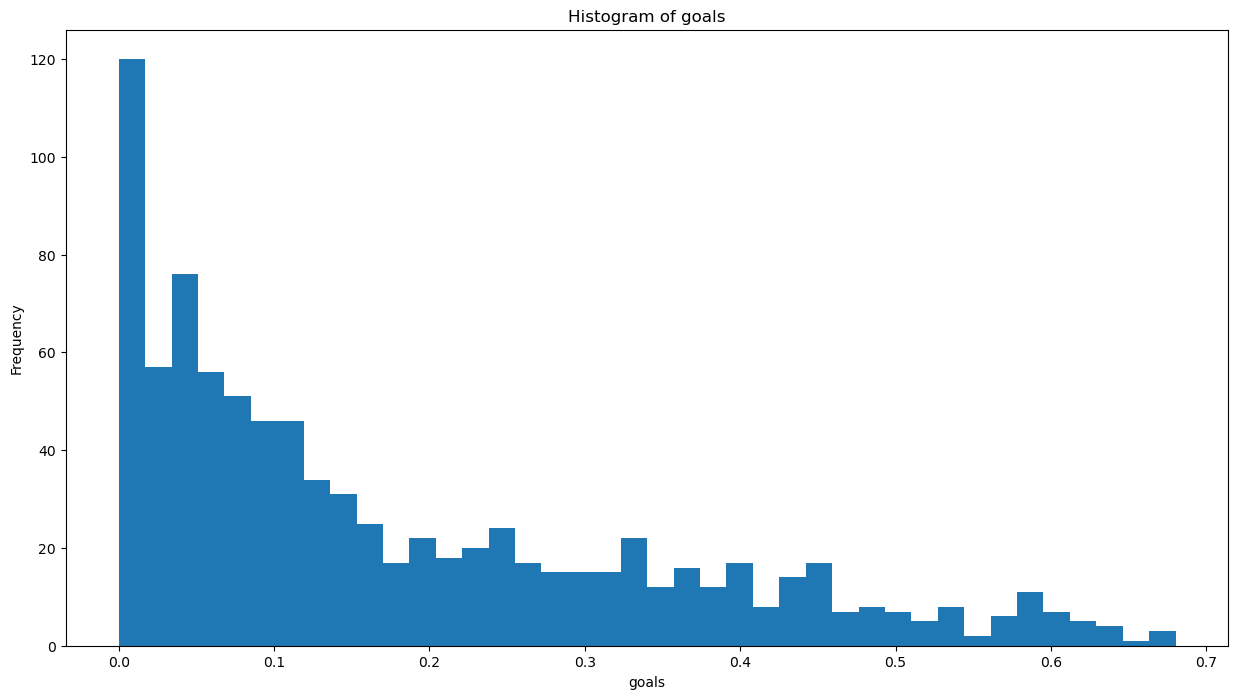

In [38]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['goals'], bins=40)                         
plt.xlabel('goals')
plt.ylabel('Frequency')
plt.title('Histogram of goals')
plt.show()

In [39]:
df_pl['current_value'].value_counts

<bound method IndexOpsMixin.value_counts of 0        15000000
1         1500000
3        50000000
4        40000000
5        25000000
           ...   
9402      4000000
9423       800000
9428      7000000
10453      500000
10736     1500000
Name: current_value, Length: 897, dtype: int64>

In [42]:
Q1 = df_pl['current_value'].quantile(0.25)
Q3 = df_pl['current_value'].quantile(0.75)
IQR = Q3 - Q1
df_pl3=df_pl[(df_pl['current_value'] >= Q1 - 1.5 * IQR) & (df_pl['current_value'] <= Q3 + 1.5 * IQR)]
df_pl3

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0000,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0000,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,Al-Hilal Saudi FC,Moussa Marega,Attack-RightWinger,183.0,32.0,71,0.377668,0.098522,0.098522,0.0000,...,0.000000,0.000000,5481,84,13,8,4000000,30000000,4,1
9423,Al-Nassr FC,Luiz Gustavo,midfield-DefensiveMidfield,187.0,35.0,60,0.132576,0.094697,0.189394,0.0000,...,0.000000,0.000000,4752,324,44,7,800000,22000000,3,0
9428,Al-Nassr FC,Pity Martínez,midfield-AttackingMidfield,170.0,29.0,29,0.451128,0.112782,0.281955,0.0000,...,0.000000,0.000000,1596,553,56,12,7000000,20000000,3,0
10453,Melbourne Victory,Nani,Attack-LeftWinger,177.0,36.0,20,0.000000,0.275510,0.275510,0.0000,...,0.000000,0.000000,980,394,57,17,500000,36500000,4,1


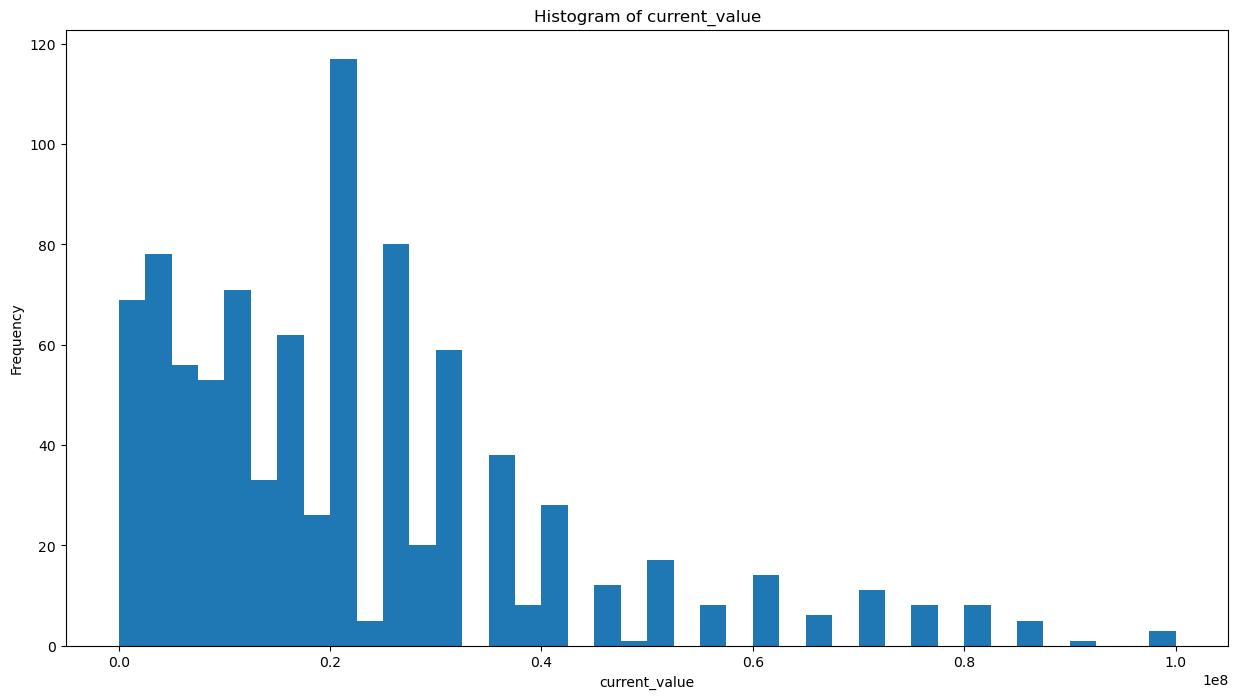

In [44]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['current_value'], bins=40)                         
plt.xlabel('current_value')
plt.ylabel('Frequency')
plt.title('Histogram of current_value')
plt.show()

In [45]:
Q1 = df_pl['current_value'].quantile(0.25)
Q3 = df_pl['current_value'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['current_value'] >= Q1 - 1.5 * IQR) & (df_pl['current_value'] <= Q3 + 1.5 * IQR)]

In [48]:
Q1 = df_pl['age'].quantile(0.25)
Q3 = df_pl['age'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['age'] >= Q1 - 1.5 * IQR) & (df_pl['age'] <= Q3 + 1.5 * IQR)]

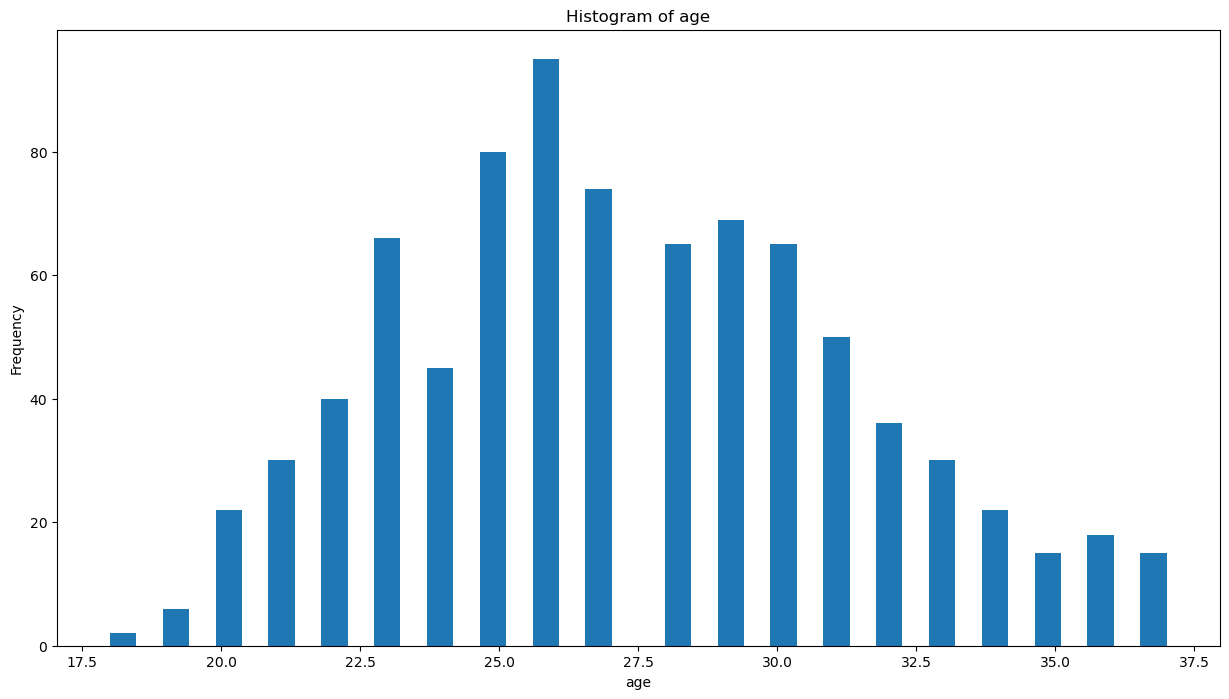

In [50]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['age'], bins=40)                         
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of age')
plt.show()

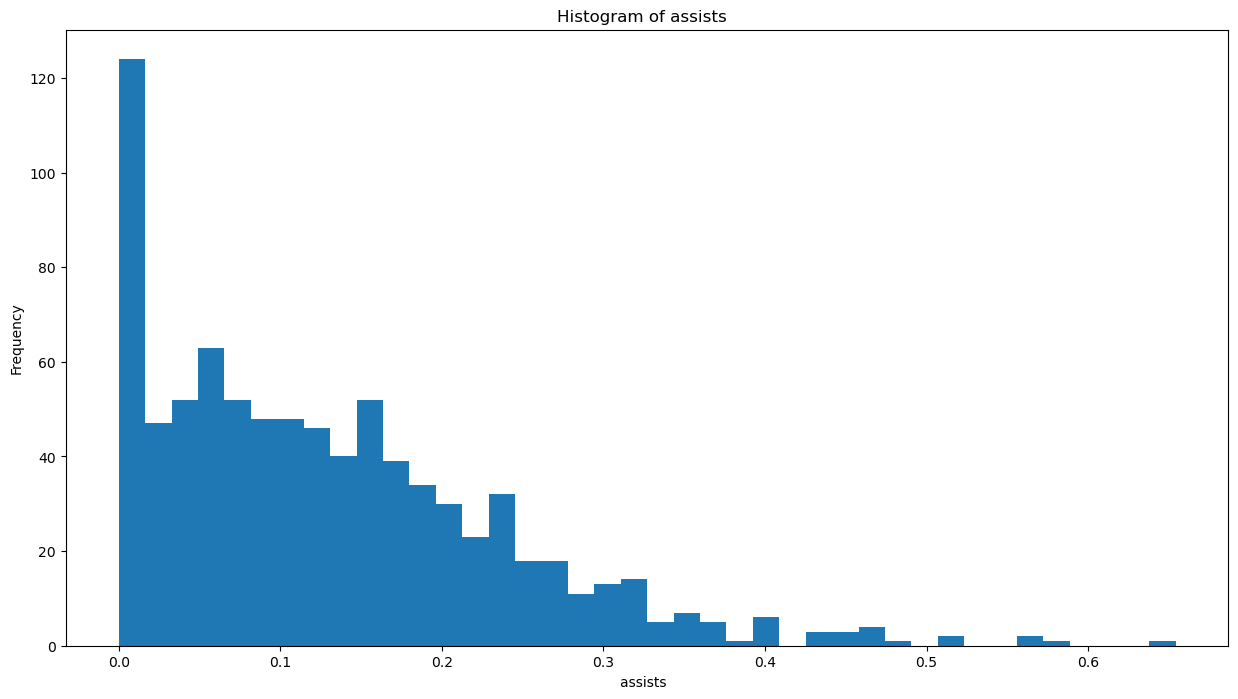

In [51]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['assists'], bins=40)                         
plt.xlabel('assists  ')
plt.ylabel('Frequency')
plt.title('Histogram of assists  ')
plt.show()

In [53]:
Q1 = df_pl['assists'].quantile(0.25)
Q3 = df_pl['assists'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['assists'] >= Q1 - 1.5 * IQR) & (df_pl['assists'] <= Q3 + 1.5 * IQR)]

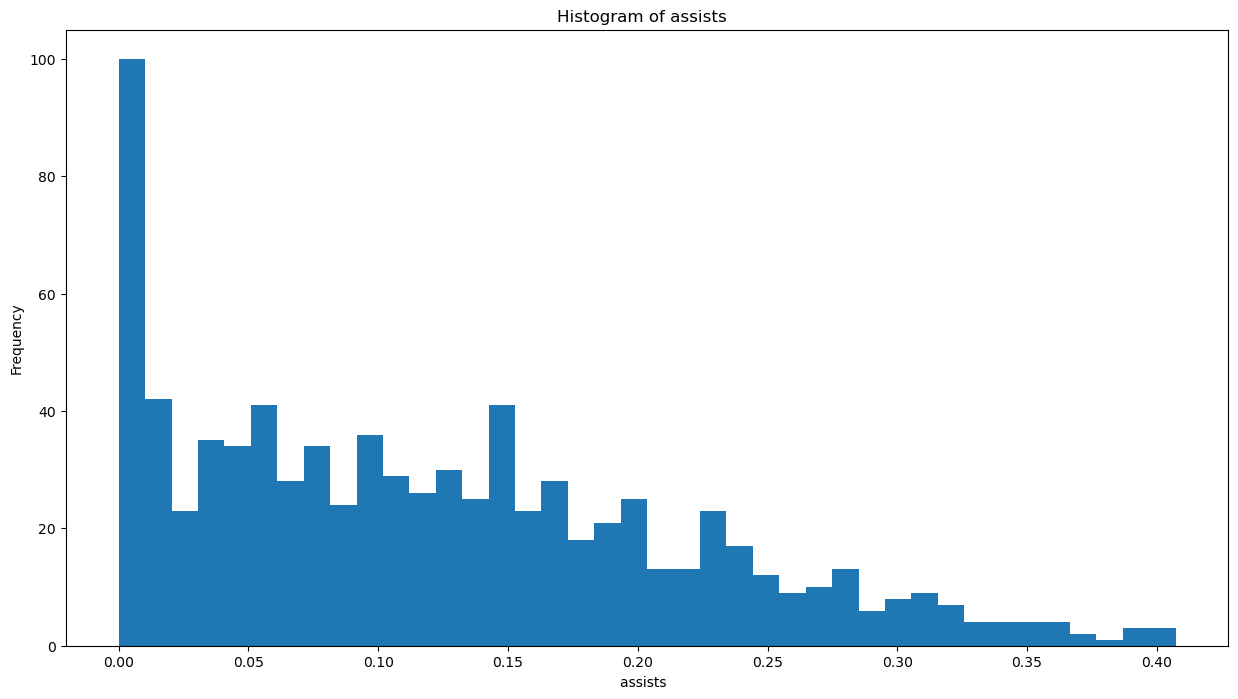

In [56]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['assists'], bins=40)                         
plt.xlabel('assists  ')
plt.ylabel('Frequency')
plt.title('Histogram of assists  ')
plt.show()

In [57]:
Q1 = df_pl['height'].quantile(0.25)
Q3 = df_pl['height'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['height'] >= Q1 - 1.5 * IQR) & (df_pl['height'] <= Q3 + 1.5 * IQR)]

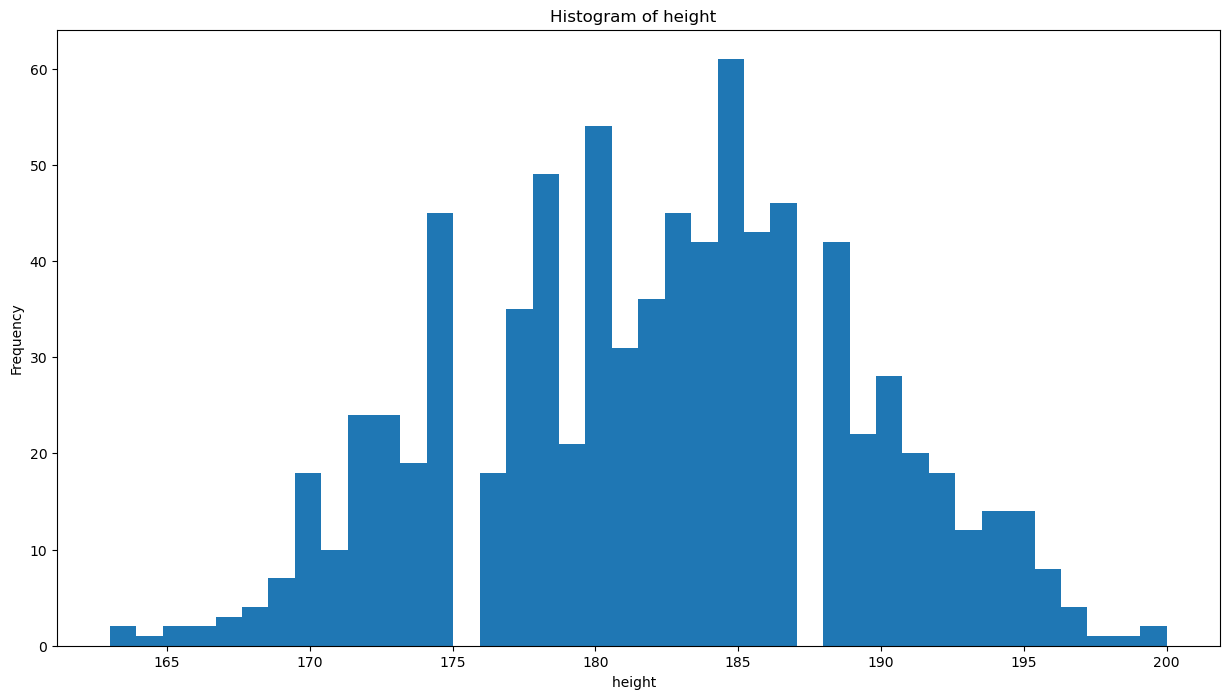

In [60]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['height'], bins=40)                         
plt.xlabel('height  ')
plt.ylabel('Frequency')
plt.title('Histogram of height  ')
plt.show()

In [61]:
Q1 = df_pl['appearance'].quantile(0.25)
Q3 = df_pl['appearance'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['appearance'] >= Q1 - 1.5 * IQR) & (df_pl['appearance'] <= Q3 + 1.5 * IQR)]

In [64]:
df_pl

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0000,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,...,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,Al-Hilal Saudi FC,Moussa Marega,Attack-RightWinger,183.0,32.0,71,0.377668,0.098522,0.098522,0.0000,...,0.000000,0.000000,5481,84,13,8,4000000,30000000,4,1
9423,Al-Nassr FC,Luiz Gustavo,midfield-DefensiveMidfield,187.0,35.0,60,0.132576,0.094697,0.189394,0.0000,...,0.000000,0.000000,4752,324,44,7,800000,22000000,3,0
9428,Al-Nassr FC,Pity Martínez,midfield-AttackingMidfield,170.0,29.0,29,0.451128,0.112782,0.281955,0.0000,...,0.000000,0.000000,1596,553,56,12,7000000,20000000,3,0
10453,Melbourne Victory,Nani,Attack-LeftWinger,177.0,36.0,20,0.000000,0.275510,0.275510,0.0000,...,0.000000,0.000000,980,394,57,17,500000,36500000,4,1


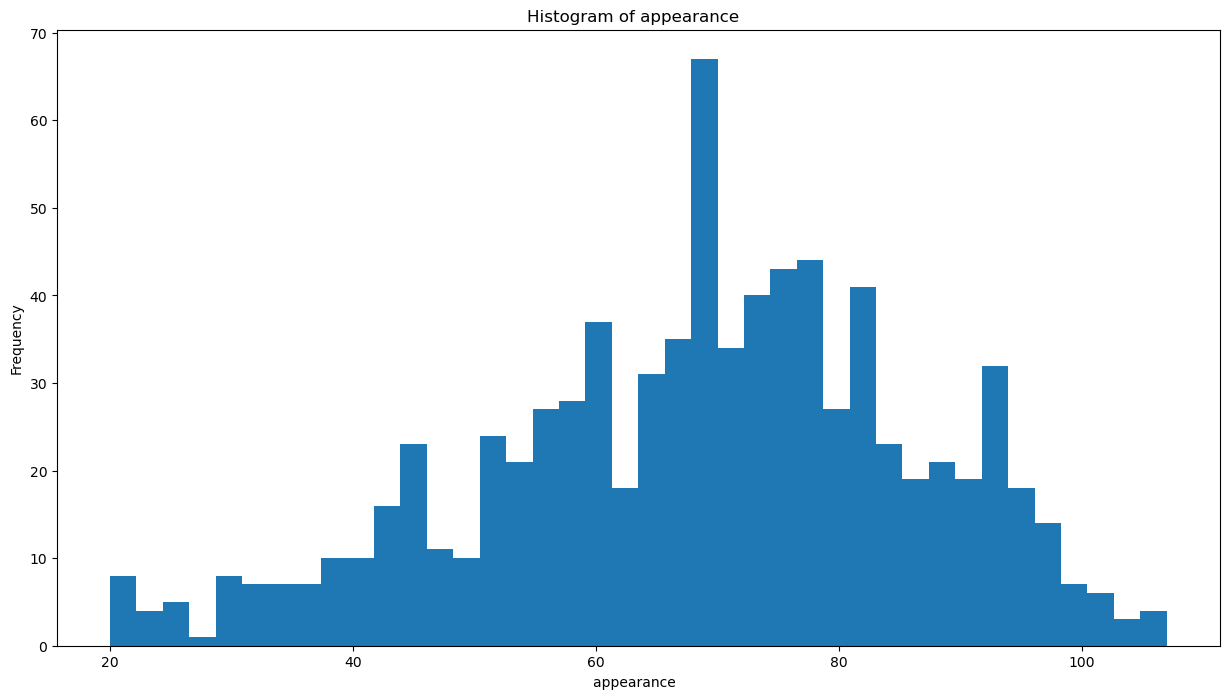

In [66]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['appearance'], bins=40)                         
plt.xlabel('appearance  ')
plt.ylabel('Frequency')
plt.title('Histogram of appearance  ')
plt.show()

In [67]:
Q1 = df_pl['yellow cards'].quantile(0.25)
Q3 = df_pl['yellow cards'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['yellow cards'] >= Q1 - 1.5 * IQR) & (df_pl['yellow cards'] <= Q3 + 1.5 * IQR)]

In [70]:
Q1 = df_pl['second yellow cards'].quantile(0.25)
Q3 = df_pl['second yellow cards'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['second yellow cards'] >= Q1 - 1.5 * IQR) & (df_pl['second yellow cards'] <= Q3 + 1.5 * IQR)]

In [72]:
Q1 = df_pl['goals conceded'].quantile(0.25)
Q3 = df_pl['goals conceded'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['goals conceded'] >= Q1 - 1.5 * IQR) & (df_pl['goals conceded'] <= Q3 + 1.5 * IQR)]

In [74]:
Q1 = df_pl['clean sheets'].quantile(0.25)
Q3 = df_pl['clean sheets'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['clean sheets'] >= Q1 - 1.5 * IQR) & (df_pl['clean sheets'] <= Q3 + 1.5 * IQR)]

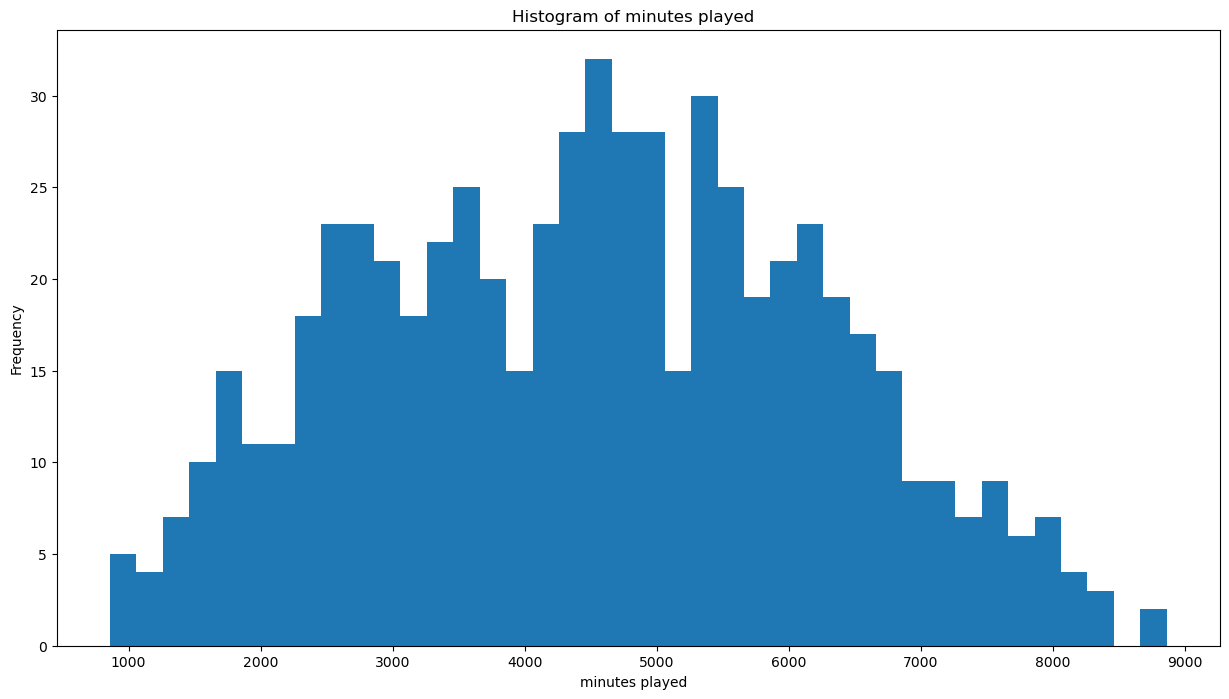

In [76]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['minutes played'], bins=40)                         
plt.xlabel('minutes played  ')
plt.ylabel('Frequency')
plt.title('Histogram of minutes played  ')
plt.show()

In [77]:
Q1 = df_pl['days_injured'].quantile(0.25)
Q3 = df_pl['days_injured'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['days_injured'] >= Q1 - 1.5 * IQR) & (df_pl['days_injured'] <= Q3 + 1.5 * IQR)]

In [80]:
Q1 = df_pl['games_injured'].quantile(0.25)
Q3 = df_pl['games_injured'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['games_injured'] >= Q1 - 1.5 * IQR) & (df_pl['games_injured'] <= Q3 + 1.5 * IQR)]

In [82]:
Q1 = df_pl['award'].quantile(0.25)
Q3 = df_pl['award'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['award'] >= Q1 - 1.5 * IQR) & (df_pl['award'] <= Q3 + 1.5 * IQR)]

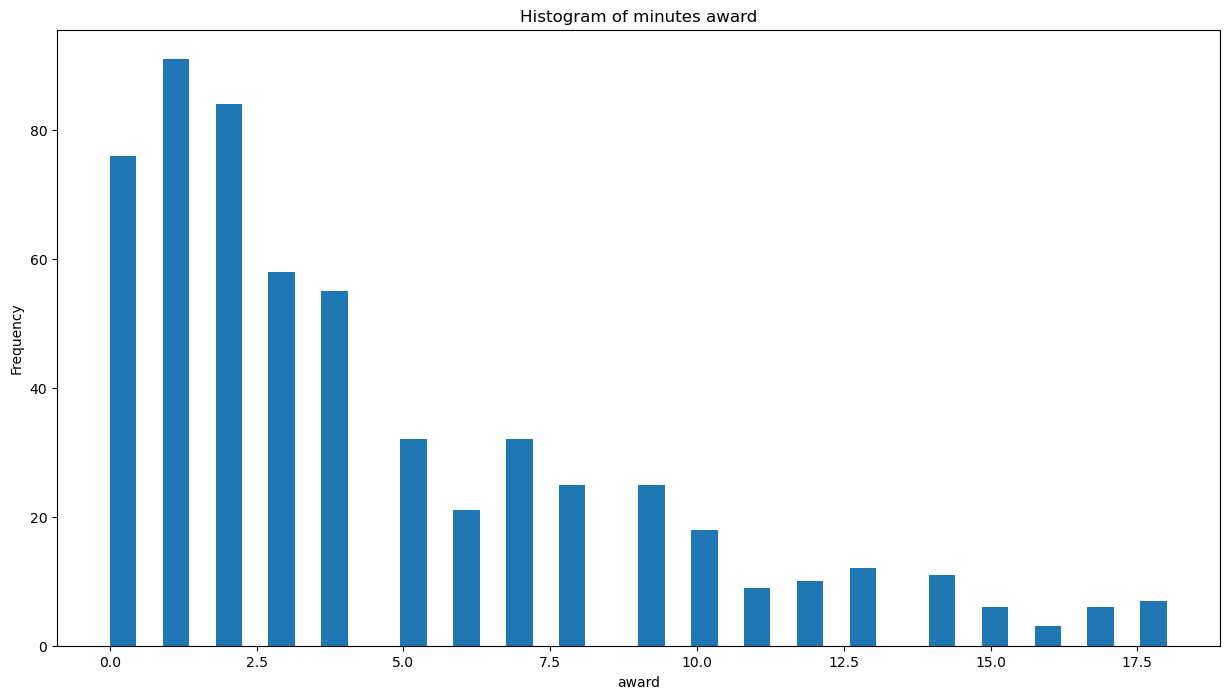

In [84]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['award'], bins=40)                         
plt.xlabel('award')
plt.ylabel('Frequency')
plt.title('Histogram of minutes award')
plt.show()

In [85]:
Q1 = df_pl['position_encoded'].quantile(0.25)
Q3 = df_pl['position_encoded'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['position_encoded'] >= Q1 - 1.5 * IQR) & (df_pl['position_encoded'] <= Q3 + 1.5 * IQR)]

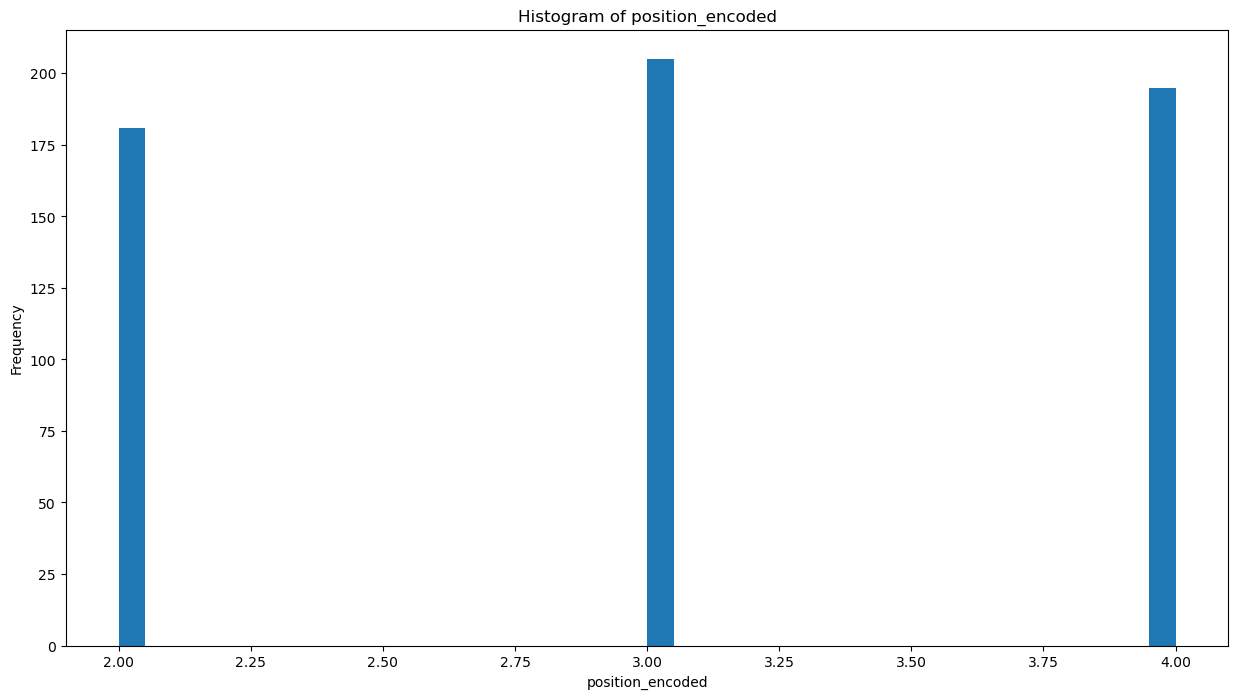

In [88]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['position_encoded'], bins=40)                         
plt.xlabel('position_encoded')
plt.ylabel('Frequency')
plt.title('Histogram of position_encoded')
plt.show()

In [89]:
df_pl

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,...,0.0,0.0,6408,175,22,9,50000000,50000000,2,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0,...,0.0,0.0,5471,95,19,10,15000000,35000000,2,0
9,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,0.0,...,0.0,0.0,5854,443,70,4,35000000,42000000,2,1
10,Manchester United,Tyrell Malacia,Defender Left-Back,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,...,0.0,0.0,7132,182,15,3,22000000,22000000,2,1
12,Manchester United,Diogo Dalot,Defender Right-Back,183.0,24.0,72,0.032293,0.048439,0.226050,0.0,...,0.0,0.0,5574,328,49,3,35000000,35000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,Al-Hilal Saudi FC,Moussa Marega,Attack-RightWinger,183.0,32.0,71,0.377668,0.098522,0.098522,0.0,...,0.0,0.0,5481,84,13,8,4000000,30000000,4,1
9423,Al-Nassr FC,Luiz Gustavo,midfield-DefensiveMidfield,187.0,35.0,60,0.132576,0.094697,0.189394,0.0,...,0.0,0.0,4752,324,44,7,800000,22000000,3,0
9428,Al-Nassr FC,Pity Martínez,midfield-AttackingMidfield,170.0,29.0,29,0.451128,0.112782,0.281955,0.0,...,0.0,0.0,1596,553,56,12,7000000,20000000,3,0
10453,Melbourne Victory,Nani,Attack-LeftWinger,177.0,36.0,20,0.000000,0.275510,0.275510,0.0,...,0.0,0.0,980,394,57,17,500000,36500000,4,1


In [92]:
df_pl = pd.get_dummies(df_pl, columns=categorical_features)

In [94]:
df_pl.shape

(581, 733)

In [96]:
correlation = df_pl.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
minutes played         0.463232
appearance             0.436727
highest_value          0.418996
team_FC Barcelona      0.172511
                         ...   
games_injured         -0.260484
age                   -0.509667
second yellow cards         NaN
goals conceded              NaN
clean sheets                NaN
Name: current_value, Length: 733, dtype: float64


In [97]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['age', 'appearance', 'minutes played', 'days_injured', 'games_injured',
       'current_value', 'highest_value'],
      dtype='object')

In [98]:
selected_features=['age', 'appearance', 'minutes played', 'days_injured', 'games_injured',
       'current_value', 'highest_value']

In [99]:
df_pl=df_pl[selected_features]
df_pl.head(2)

,age,appearance,minutes played,days_injured,games_injured,current_value,highest_value
3,25.0,82,6408,175,22,50000000,50000000
6,28.0,70,5471,95,19,15000000,35000000


In [101]:
X = df_pl.drop(['current_value'], axis=1)
y = df_pl['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
X.shape

(581, 6)

In [108]:
model = LinearRegression()

In [110]:
ridge_model = Ridge()

In [112]:
lasso_model = Lasso()

In [114]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [116]:
# Initialize a GridSearchCV object


In [118]:
model.fit(X_train_scaled, y_train)


LinearRegression()

In [120]:
grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 5}
Best Parameters for lasso model: {'alpha': 0}


In [121]:
y_pred = model.predict(X_test_scaled)
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

In [122]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient']) 
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients

In [126]:
coeff_df

,Coefficient
age,-6.823378e+06
appearance,6.486119e+05
minutes played,4.739322e+06
days_injured,1.602979e+06
games_injured,-1.261970e+06
highest_value,5.727262e+06


In [128]:
coeff_df_ridge


,Coefficient
age,-1.791178e+06
appearance,3.777858e+04
minutes played,2.814540e+03
days_injured,1.033723e+04
games_injured,-5.555517e+04
highest_value,3.843719e-01


In [130]:
coeff_df_lasso

,Coefficient
age,-1.792787e+06
appearance,3.775485e+04
minutes played,2.815005e+03
days_injured,1.032702e+04
games_injured,-5.538513e+04
highest_value,3.844081e-01


In [132]:
print(f" Linear regression intercept: {model.intercept_}") 
print(f" Ridge model intercept: {best_model_ridge.intercept_}") 
print(f" Lasso model intercept: {best_model_lasso.intercept_}") 

 Linear regression intercept: 18935129.310344826
 Ridge model intercept: 38008046.729986444
 Lasso model intercept: 38046384.53087481


In [135]:
y_base = [y_train.mean()] * len(y_test)
y_base[1]

18935129.310344826

In [137]:
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 214767701980322.7


In [139]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge}')

# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso}')

Mean Squared Error for training: 59082346266777.31
Mean Squared Error for testing: 71667099643221.4
Mean Squared Error for training ridge model: 507299319233686.1
Mean Squared Error for testing ridge model: 452093538504999.9
Mean Squared Error for training lasso model: 508750289922374.75
Mean Squared Error for testing lasso model: 453342097688717.56


In [141]:
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 11279430.076628353


In [143]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge}')

# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso}')

Mean Absolute Error for training: 5923297.485603945
Mean Absolute Error for testing: 6342534.419399786
Mean Absolute Error for training ridge model: 20407267.742459938
Mean Absolute Error for testing ridge model: 19145483.835463576
Mean Absolute Error for training lasso model: 20439585.26081051
Mean Absolute Error for testing lasso model: 19173042.037283346


In [145]:
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 3358.486277570351


In [147]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge)}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge)}')

# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso)}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso)}')

Root Mean Squared Error for training: 7686504.164233394
Root Mean Squared Error for testing: 8465642.305414362
Root Mean Squared Error for training ridge model: 22523306.134617228
Root Mean Squared Error for testing ridge model: 21262491.352261614
Root Mean Squared Error for training lasso model: 22555493.56414917
Root Mean Squared Error for testing lasso model: 21291831.71285922


In [149]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train}')
print(f'R Square for testing ridge model: {r2_score_test}')

# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train}')
print(f'R Square for testing lasso model: {r2_score_test}')

R Square for training: 0.6378674418961079
R Square for testing: 0.6564256495665908
R Square for training ridge model: 0.6378674418961079
R Square for testing ridge model: 0.6564256495665908
R Square for training lasso model: 0.6378674418961079
R Square for testing lasso model: 0.6564256495665908


In [151]:
predictions = model.predict(X_test_scaled)


In [153]:
Real_Values = np.array(y_test)


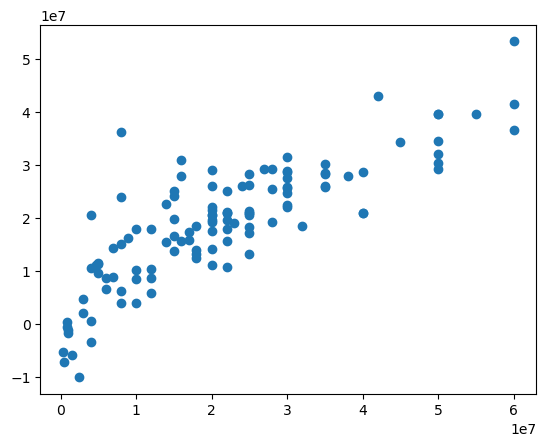

In [155]:
plt.scatter(Real_Values,predictions); 

<Axes: xlabel='current_value', ylabel='Density'>

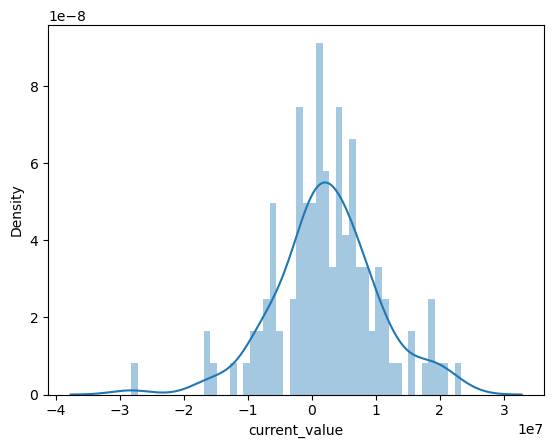

In [157]:
sns.distplot((y_test-predictions),bins=50)